# Repeated Measurements
As alluded to in the introduction, experiments where multiple measurements are taken from the same subject are problematic from an analysis perspective. These are known as *repeated measurement*, *repeated measures* or *within-subject* designs. In this first part, we will explore *why* these designs cause problems, before spending the rest of the lesson discussing some traditional remedies. This is all ground work to allow us to begin on the core topic of *linear mixed-effects models* next week. 

## Repeated Measurement Designs
Up until now the only experimental designs we have considered, from an analysis perspective, are those where a *single* measurement is taken from each subject[^subject-foot]. This means that every row of our data sets and every value of $y$ was considered a *separate* subject. Thinking back to the idea of factorial experiments, this means that *different* experimental conditions represent different groups of individuals. No single individual was present in *both* groups and thus different subjects were randomised to different experimental conditions. These are known as *independent measures* or *between-subjects* designs. For example, the illustration in  {numref}`between-sub-fig`. shows a between-subjects design where half the sample undergo a happy mood induction and the other half undergo a sad mood induction.

```{figure} ./images/between-subjects-design.png
---
width: 600px
name: between-sub-fig
---
An example of a between-subjects design for a happy and sad mood induction experiment.
```

A different form of design comes from an experiment where each subject participates in *every* experimental condition. For instance, each subject performs a task that has 3 different difficulty conditions (*easy*, *medium*, *hard*). If each subject performs each of these conditions then we have 3 measurements per-subject and this is known as a *repeated measures* or *within-subject* design[^long-foot]. In this example, there is nothing fundamental about the experiment that forces it to be repeated measurements. A between-subjects variant could easily be conducted where each subject participates in only *one* of the experimental conditions. As such, for this particular example, repeated measurements are a *choice* rather than a fundamental reality of the data. This experimental setup is illustrated in {numref}`within-sub-fig`.

```{figure} ./images/within-subject-design.png
---
width: 500px
name: within-sub-fig
---
An example of a within-subject design for 3 different difficulty conditions of an experiment.
```

Finally, both *between-subjects* and *within-subject* designs can be combined. As an example, we could continue our example of task difficulty, where every subject participates in every condition. However, now let us say that half those subjects receive a *sad* mood induction and half receive a *happy* mood induction. We now have *two* experimental manipulations, one of which is conducted *within-subject* (difficulty condition) and one of which is conducted *between-subjects* (mood induction). This is illustrated in {numref}`mixed-measures-fig`.

```{figure} ./images/mixed-measures-design.png
---
width: 500px
name: mixed-measures-fig
---
An example of a design with both a within-subject and between-subjects experimental manipulation.
```

These types of designs have a variety of names, none of which are ideal. Psychologists often call these *mixed* designs, as a shorthand for *mixed measures*. This can seem sensible, but unfortunately *mixed* could also mean *mixed-effects*, which is the focus of this section of the unit. To add to the confusion, mixed-measures designs can be analysed using mixed-effects methods, but the two are not always equivalent. A psychologist and a statistician could have a perfectly reasonable conversation about "mixed models", not even realising they are talking about different things. Statisticians will often call these *split-plot* designs, due to their history in the world of agriculture, but this is not a term psychologists often use. For our purpose, we can collapse these types of designs under the generic banner of *repeated measurement* designs to avoid any confusion. When doing this, we can define repeated measurement designs as those *with at least* one within-subject manipulation. This does not exclude the possibility of any other type of manipulation and thus covers both "pure" within-subject designs and mixed within-subject/between-subjects designs

## Repeated Measurements and Correlation
Now that we have established what repeated measurements are in the context of experimental design, we can turn to the main topic of this part of the lesson: *why are repeated measurements a problem*? To understand the issue, it is useful to see some example repeated measurement data. Below, we load the `selfesteem` data set from the `datarium` package. These contains measures of self-esteem taken from 10 subjects across 3 different time-points, as shown below.

In [1]:
library('datarium')
data(selfesteem)
selfesteem

   id       t1       t2       t3
1   1 4.005027 5.182286 7.107831
2   2 2.558124 6.912915 6.308434
3   3 3.244241 4.443434 9.778410
4   4 3.419538 4.711696 8.347124
5   5 2.871243 3.908429 6.457287
6   6 2.045868 5.340549 6.653224
7   7 3.525992 5.580695 6.840157
8   8 3.179425 4.370234 7.818623
9   9 3.507964 4.399808 8.471229
10 10 3.043798 4.489376 8.581100

Because these are measurements *across time* and *ordered*, it would be more correct to characterise this as a *longitudinal* design. But, to keep things simple, we will ignore the temporal aspect for now and just focus on the time-points as if they were any repeated measurements where order does not matter. To see the core issue here, let us examine the pairs plots between the time-points

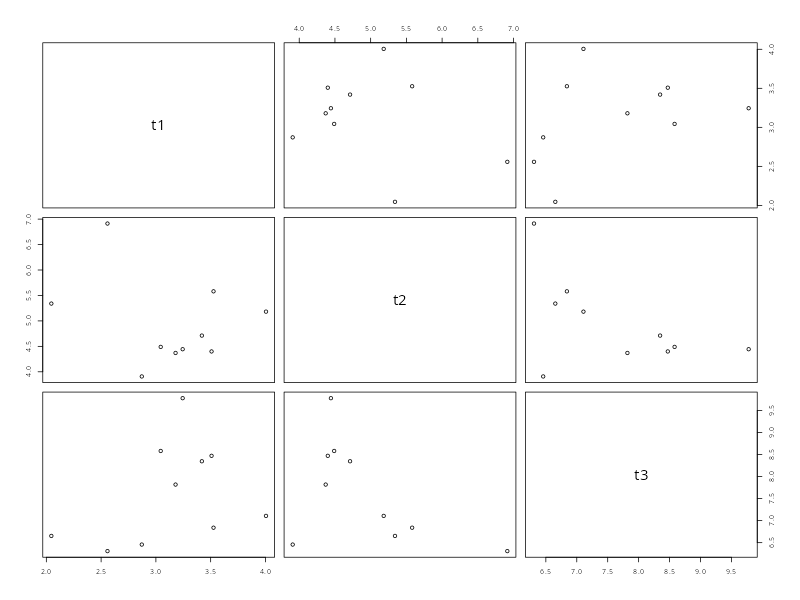

In [17]:
with(selfesteem, pairs(~ t1 + t2 + t3))

Although somewhat subtle, notice that there appears to be a relationship between time-points, particularly those that are close (such as `t2` and `t3`). Let us calculate the correlation

In [3]:
cor(selfesteem[,2:4])

          t1         t2         t3
t1  1.000000 -0.2672690  0.3606020
t2 -0.267269  1.0000000 -0.5230331
t3  0.360602 -0.5230331  1.0000000

So, now we see the core problem here: *repeated measurements are correlated*. 

Although this may not necessarily seem like a big deal, this is actually a *massive* problem for our statistical modelling framework. The reasons *why* will not be very clear right now, but we will discuss them in more detail further below. Before getting there, it is worth highlighting that this correlation is not some funny feature of this one particular dataset. It is a feature of *all* repeated measurements. So much so that we never usually check for it, we just assume that it is there. This is a *feature of reality*. If multiple measurements are taken from the same experimental unit then they will be connected in some fashion. This is true whether the units are *people*, *rats*, *schools*, *classrooms*, *brains*, *cages* or anything else. The point is that the data come from the same source and that source creates a *connection* between measurements. 

`````{admonition} Repeated Measurements on Human Subjects
:class: tip
In the case of human subjects, we can think of correlation as representing the *internal consistency* of a single individual. If someone is slow at responding during one experimental condition, it is likely they will be slow responding during another experimental condition. There is not pure randomness at play here. There is not an infinite range of responses a subject could give during one experimental condition, irrespective of the responses given during a different experimental condition. The person themselves constrains the reasonable range of responses. As such, their responses during one condition provides a prediction of their responses during a different condition. Their biology and psychology provides a constraint that is captured by the correlation. Importantly, this does not apply to measurements taken from a different subject, who will have their own range of constraints. As such, we conceptualise measurements from *within* a subject as correlated, but measurements from *between* subjects as independent. This is why this has not been a problem before, because every previous example we have seen involved only a *single* measurement of each experimental unit.
``````

## Why is Correlation a Problem?

[^subject-foot]: We will refer generically to *subjects* throughout these materials, as the assumption is that you will generally be working with behavioural data from humans. However, it is worth knowing that statistics has the more general concept of a *unit of analysis*, which could be *humans*, *rats*, *genes*, *schools* or anything else that our inference is based upon.

[^long-foot]: When repeated measurements are taken across longer temporal gaps (e.g. different days, weeks or months), these types of design are often known as *longitudinal* designs. Similarly, if many measurements are taken in close succession over time, these types of data are often viewed as a *time series*. The only real difference is that the measurements have a *specific order* to them and the analysis has to take this order into account. For most repeated measurement designs, the order of the repeats does not matter and is often randomised across subjects.